# **[MSIB Batch 7] BitLabs Academy Midterm DAB 7**
Kelompok 3 :
1. Syayid Muhammad Akbar        (CS04-466)
2. Farras Daffa Yassarramadhan  (CS04-172)
3. Syadira Hanaya               (CS04-214)

# Import data dan Preprocessing

Anda diminta untuk melakukan data preprocessing untuk membersihkan beberapa data yang "kotor" yang ada pada dataset. Hasil dari tahapan ini adalah sebuah dataset mentah yang sudah bersih dari duplication, inconsistent, dan missing data.

Import library yang diperlukan untuk melakukan analisis

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Load data csv menggunakan Pandas

In [179]:
data = pd.read_csv('/content/midterm_hotel_data.csv')
pd.set_option('display.max_columns', None)

In [180]:
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342.0,2015,July,27,1,NaN,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,737.0,2015,July,27,1,0.0,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7.0,2015,July,27,1,NaN,1,1.0,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,NaN,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1,1.0,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,NaN,0,NaN,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,NaN,2015,July,27,1,0.0,2,NaN,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,NaN,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [181]:
data.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,83573.000000,119390.000000,119390.000000,119390.000000,83573.000000,119390.000000,83573.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,83573.000000,119390.000000,83573.000000
mean,59694.500000,0.370416,104.114965,2016.156554,27.165173,15.798241,0.924366,2.500302,1.855934,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.985427,0.062518,0.572553
std,34465.068657,0.482918,106.917703,0.707476,13.605138,8.780829,0.995809,1.908286,0.602225,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,48.140440,0.245291,0.792058
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.670000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,0.000000
75%,89541.750000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


Melihat informasi mengenai data yang akan digunakan (Melihat data type dan jumlah data)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       83573 non-null   float64
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         83573 non-null   float64
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          83573 non-null   float64
 11  children                        119386 non-null  float64
 12  babies          

In [183]:
data.shape

(119390, 37)

Cek jumlah data duplikat di dalam dataset

In [184]:
duplikat = data.duplicated().sum()
print("Jumlah duplikat data: ", duplikat)

Jumlah duplikat data:  0


Mengkonversikan kolom **reservation_status_date** ke dalam bentuk Date Time

In [185]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

Drop kolom yang tidak digunakan

In [186]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

Melakukan pengecekan nilai NaN pada data di setiap kolom

In [187]:
import pandas as pd

def get_columns_with_missing_values(df):
  """
  Identifies and returns a dictionary containing columns with missing values
  and their counts in a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A dictionary where keys are column names with missing values and values are
    the corresponding counts of missing values.
  """

  # Get columns with missing values and their counts
  missing_values_info = df.isnull().sum()

  # Filter to keep only columns with missing values
  missing_values_info = missing_values_info[missing_values_info > 0]

  # Convert to dictionary
  missing_values_dict = missing_values_info.to_dict()

  return missing_values_dict

# Example usage:
# Assuming 'data' is your Pandas DataFrame
data = pd.read_csv('/content/midterm_hotel_data.csv') # Replace 'your_data.csv' with your data file

missing_values_info = get_columns_with_missing_values(data)

# Print the results
if missing_values_info:
  print("Columns with missing values and their counts:")
  for column, count in missing_values_info.items():
    print(f"{column}: {count}")
else:
  print("No columns with missing values found.")# Periksa apakah data sudah bersih

Columns with missing values and their counts:
lead_time: 35817
stays_in_weekend_nights: 35817
adults: 35817
children: 4
country: 488
agent: 16340
company: 112593
adr: 35817
total_of_special_requests: 35817


1. Menghapus duplikasi (Duplicated Data):<br>
Periksa dan hilangkan baris duplikat dalam dataset, jika ada.<br><br>
2. Menangani Data yang Tidak Konsisten (Inconsistent Data):<br>
Periksa konsistensi kolom-kolom yang bersifat kategori, seperti:
Kolom __meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, customer_type, dll.__
Standarisasi data kategori yang tidak konsisten (misalnya, salah pengetikan, perbedaan huruf kapital).<br><br>
3. Menangani Data yang Hilang (Missing Data):<br>
Mengisi data yang hilang atau menghapus baris/kolom dengan data yang hilang, sesuai dengan strategi yang tepat:
Untuk kolom seperti __lead_time, stays_in_weekend_nights, adults, children, adr, dll.__, Anda bisa mengisi dengan nilai rata-rata (mean), median, atau strategi lain yang sesuai.
Kolom dengan terlalu banyak data yang hilang, seperti company, mungkin perlu dihapus jika tidak relevan.<br><br>



In [188]:
# 1. Menghapus duplikasi
duplikat = data.duplicated().sum()
print("Jumlah duplikat data: ", duplikat)

data.drop_duplicates(inplace=True)

# 2. Menangani Data yang Tidak Konsisten

# Misalnya, kolom 'meal' mungkin memiliki variasi seperti 'BB', 'FB', 'HB', dll.
# Menghitung modus dari kolom 'meal'
meal_mode = data['meal'].mode()[0]
meal_mode
# Mengganti nilai 'Undefined' dan 'Undef' menjadi modus
# data['meal'] = data['meal'].replace(['Undefined', 'Undef'], meal_mode)
data.loc[data['meal'].isin(['Undefined', 'Undef']), 'meal'] = meal_mode


# Lakukan pengecekan pada kolom-kolom kategori lainnya juga
data['market_segment'] = data['market_segment'].str.strip()  # Menghapus spasi yang tidak perlu
data['distribution_channel'] = data['distribution_channel'].str.strip()

# 3. Menangani Data yang Hilang
# Mengisi nilai yang hilang dengan strategi yang tepat
# Untuk kolom numerik, kita bisa menggunakan mean atau median
data['lead_time'] = data['lead_time'].fillna(data['lead_time'].mean())
data['stays_in_weekend_nights'] = data['stays_in_weekend_nights'].fillna(data['stays_in_weekend_nights'].mean())
data['adults'] = data['adults'].fillna(data['adults'].median())
data['children'] = data['children'].fillna(data['children'].median())
data['adr'] = data['adr'].fillna(data['adr'].mean())
data['total_of_special_requests'] = data['total_of_special_requests'].fillna(data['total_of_special_requests'].median())

# Kolom agent dan company dapat diisi dengan '0' karena bernilai numerik, atau None jika tidak ada data.
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

# Untuk kolom 'country', kita bisa mengisi dengan mode (nilai yang paling sering muncul)
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Jika kolom 'company' terlalu banyak missing value dan dianggap tidak relevan, kita bisa menghapusnya
data.drop(columns=['company'])

Jumlah duplikat data:  0


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342.000000,2015,July,27,1,0.924366,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.000000,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,737.000000,2015,July,27,1,0.000000,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.000000,0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7.000000,2015,July,27,1,0.924366,1,1.0,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.000000,0,0.0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13.000000,2015,July,27,1,0.000000,1,1.0,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,101.985427,0,0.0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,104.114965,2015,July,27,1,0.000000,2,2.0,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.000000,0,0.0,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23.000000,2017,August,35,30,2.000000,5,2.0,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,101.985427,0,0.0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,119386,City Hotel,0,104.114965,2017,August,35,31,0.924366,5,2.0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.430000,0,2.0,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,119387,City Hotel,0,104.114965,2017,August,35,31,2.000000,5,2.0,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.710000,0,0.0,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,119388,City Hotel,0,109.000000,2017,August,35,31,0.924366,5,2.0,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.400000,0,0.0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Menghitung IQR dan mendeteksi outlier pada kolom lead_time

In [189]:
# Salin data asli untuk perbandingan
original_lead_time = data['lead_time'].copy()

#Langkah 2: Menghitung IQR untuk kolom tertentu (misalnya 'lead_time')
Q1 = data['lead_time'].quantile(0.25)
Q3 = data['lead_time'].quantile(0.75)
IQR = Q3 - Q1

# Penyesuaian batas bawah dan atas dengan faktor pengali yang lebih besar
factor = 3  # Anda bisa coba dengan 2.5 atau 3
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Mendeteksi outlier
outliers = data[(data['lead_time'] < lower_bound) | (data['lead_time'] > upper_bound)]

# Winsorizing - Mengganti nilai outliers dengan batas bawah dan atas
data['lead_time'] = data['lead_time'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Menampilkan hasil
print("Jumlah Outliers sebelum Winsorizing:", len(outliers))
print("Data setelah Winsorizing:")
print(data['lead_time'].describe())

Jumlah Outliers sebelum Winsorizing: 2791
Data setelah Winsorizing:
count    119390.000000
mean        102.360514
std          83.151937
min           0.000000
25%          36.000000
50%         104.114965
75%         114.000000
max         348.000000
Name: lead_time, dtype: float64


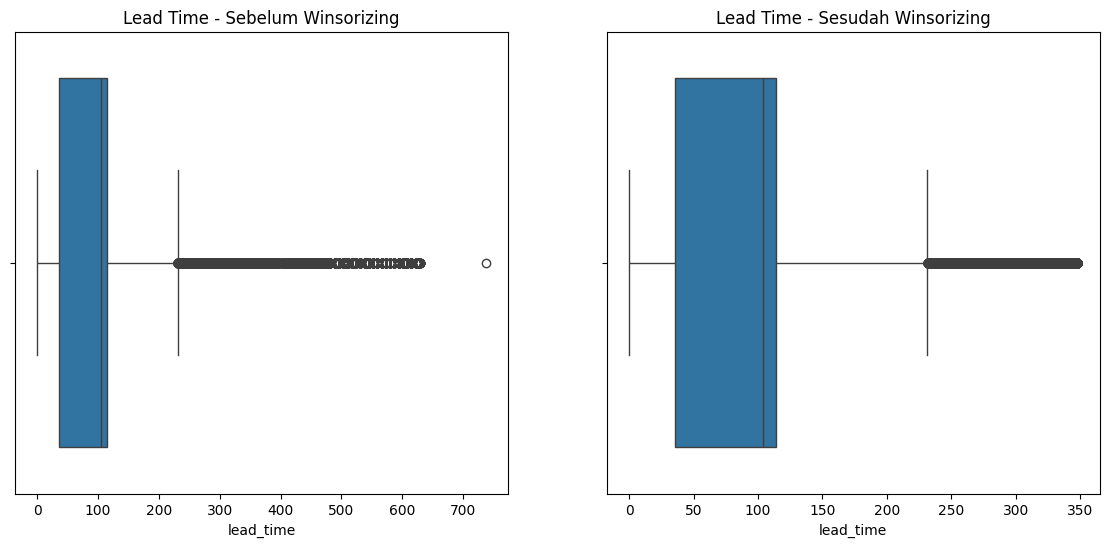

In [190]:
comparison_df = data.copy()
comparison_df['lead_time_winsorized'] =  data['lead_time']

# Membuat boxplot sebelum Winsorizing
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=original_lead_time)  # original_data adalah data sebelum Winsorizing
plt.title("Lead Time - Sebelum Winsorizing")

# Membuat boxplot sesudah Winsorizing
plt.subplot(1, 2, 2)
sns.boxplot(x=data['lead_time'])  # data setelah Winsorizing
plt.title("Lead Time - Sesudah Winsorizing")

plt.show()

Kemudian data disimpan ke file csv yang baru bernama **__cleaned_dataset_hotel.csv__**

In [191]:

# Simpan dataset yang sudah dibersihkan
data.to_csv('cleaned_dataset_hotel.csv', index=False)

print("Data preprocessing selesai. Dataset telah disimpan sebagai 'cleaned_dataset_hotel.csv'.")

Data preprocessing selesai. Dataset telah disimpan sebagai 'cleaned_dataset_hotel.csv'.


Melakukan load data yang sudah dibersihkan

In [192]:
data = pd.read_csv('cleaned_dataset_hotel.csv')

Cek nilai NaN kembali, dan memastikan tidak ada data yang NaN

In [193]:
# Periksa apakah data sudah bersih
data.isnull().sum()

,0
Unnamed: 0,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [194]:
data.head(10)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342.000000,2015,July,27,1,0.924366,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.000000,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,348.000000,2015,July,27,1,0.000000,0,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.000000,0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7.000000,2015,July,27,1,0.924366,1,1.0,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.000000,0,0.0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13.000000,2015,July,27,1,0.000000,1,1.0,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,101.985427,0,0.0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,104.114965,2015,July,27,1,0.000000,2,2.0,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.000000,0,0.0,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,5,Resort Hotel,0,14.000000,2015,July,27,1,0.000000,2,2.0,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,101.985427,0,1.0,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,6,Resort Hotel,0,104.114965,2015,July,27,1,0.000000,2,2.0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.000000,0,0.0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,7,Resort Hotel,0,9.000000,2015,July,27,1,0.000000,2,2.0,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,101.985427,0,1.0,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,8,Resort Hotel,1,104.114965,2015,July,27,1,0.000000,3,2.0,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.000000,0,1.0,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,9,Resort Hotel,1,75.000000,2015,July,27,1,0.924366,3,2.0,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.500000,0,0.0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [195]:
data.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,102.360514,2016.156554,27.165173,15.798241,0.924366,2.500302,1.899154,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.985427,0.062518,0.400787
std,34465.068657,0.482918,83.151937,0.707476,13.605138,8.780829,0.833152,1.908286,0.508163,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,40.277110,0.245291,0.712734
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,36.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,59694.500000,0.000000,104.114965,2016.000000,28.000000,16.000000,0.924366,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,101.985427,0.000000,0.000000
75%,89541.750000,1.000000,114.000000,2017.000000,38.000000,23.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,110.000000,0.000000,1.000000
max,119389.000000,1.000000,348.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


## Bagaimana rasio antara lead_time dengan jumlah hari reservasi dibatalkan (is_canceled == 1)?

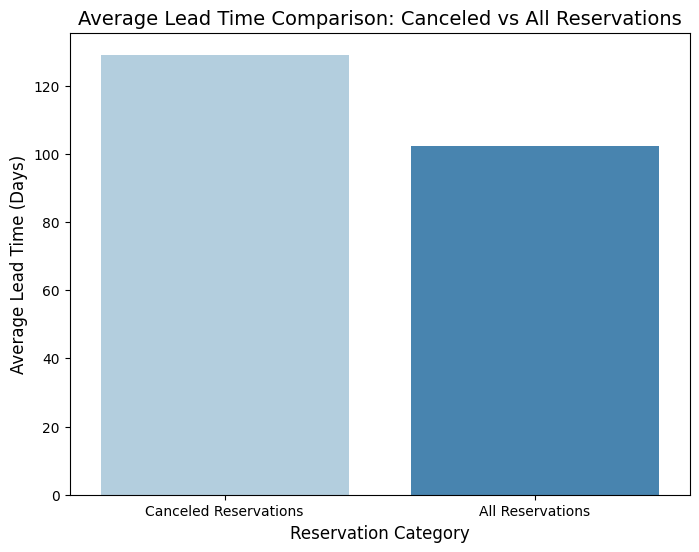

Rata-rata lead_time untuk reservasi yang dibatalkan: 129.06013721189453
Rata-rata lead_time untuk semua reservasi: 102.36051356299284


In [196]:
# 1. Filter data untuk reservasi yang dibatalkan (is_canceled == 1)
canceled_reservations = data[data['is_canceled'] == 1]

# 2. Menghitung rata-rata lead_time untuk reservasi yang dibatalkan
avg_lead_time_canceled = canceled_reservations['lead_time'].mean()

# 3. Menghitung rata-rata lead_time untuk semua reservasi
avg_lead_time_all = data['lead_time'].mean()

# 4. Menyimpan nilai rata-rata dalam sebuah DataFrame untuk visualisasi
avg_lead_time_data = pd.DataFrame({
    'Category': ['Canceled Reservations', 'All Reservations'],
    'Lead Time': [avg_lead_time_canceled, avg_lead_time_all]
})

# 5. Membuat bar plot untuk membandingkan rata-rata lead_time
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Lead Time', data=avg_lead_time_data, palette='Blues',hue='Category')


# Menambahkan title dan labels
plt.title('Average Lead Time Comparison: Canceled vs All Reservations', fontsize=14)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.xlabel('Reservation Category', fontsize=12)

# Menampilkan grafik
plt.show()

# Menampilkan hasil rata-rata
print(f"Rata-rata lead_time untuk reservasi yang dibatalkan: {avg_lead_time_canceled}")
print(f"Rata-rata lead_time untuk semua reservasi: {avg_lead_time_all}")

## Apakah ada perbedaan pola pendapatan antara Resort Hotel dan City Hotel selama beberapa bulan tertentu?

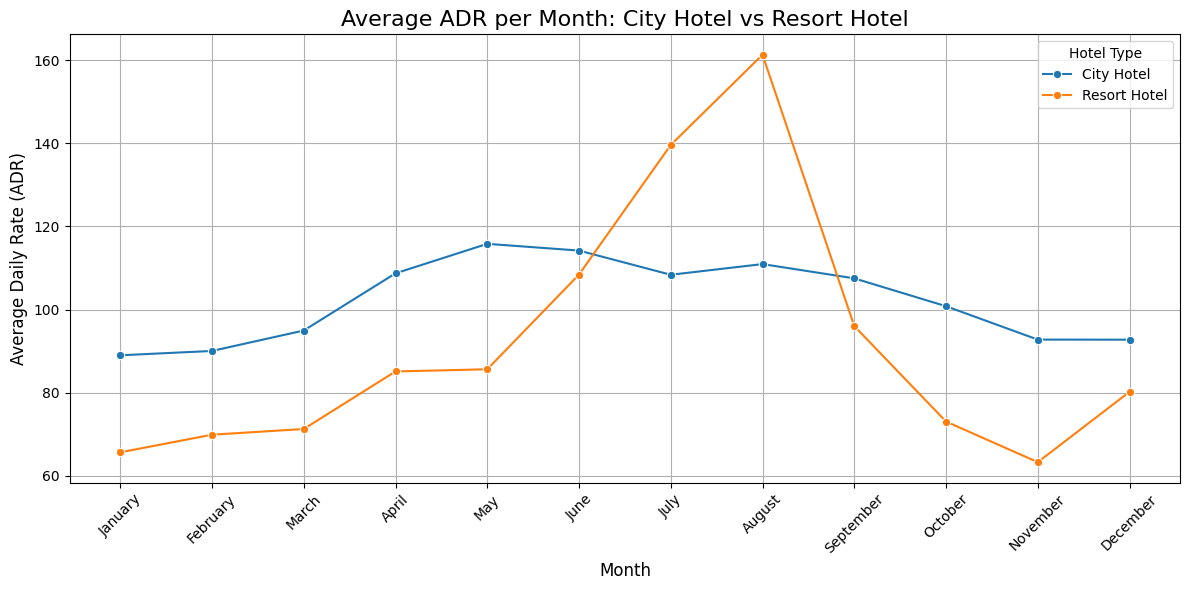

In [197]:
# Pastikan kolom 'arrival_date_month' dalam urutan yang benar
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# 1. Kelompokkan data berdasarkan bulan dan jenis hotel, lalu hitung rata-rata ADR per bulan
avg_adr_per_month = data.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()

# Pastikan bulan diurutkan sesuai dengan urutan bulan kalender
avg_adr_per_month['arrival_date_month'] = pd.Categorical(avg_adr_per_month['arrival_date_month'], categories=month_order, ordered=True)
avg_adr_per_month = avg_adr_per_month.sort_values('arrival_date_month')

# 2. Membuat line plot untuk membandingkan pola pendapatan (ADR) antara Resort Hotel dan City Hotel
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=avg_adr_per_month, marker='o')

# Menambahkan title dan labels
plt.title('Average ADR per Month: City Hotel vs Resort Hotel', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Hotel Type')
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Turis dari negara mana sajakah yang sering melakukan cancelling reservation baik untuk Resort Hotel maupun City Hotel.

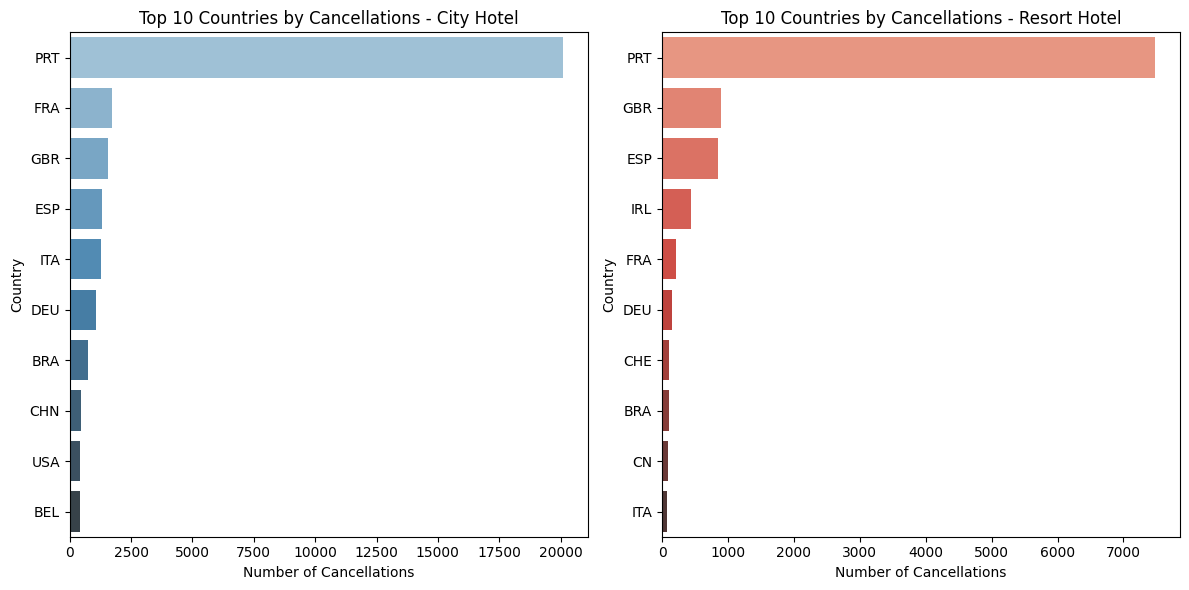

In [198]:
# 1. Filter data untuk reservasi yang dibatalkan (is_canceled == 1)
canceled_reservations = data[data['is_canceled'] == 1]

# 2. Menghitung jumlah pembatalan berdasarkan negara dan jenis hotel
canceled_by_country = canceled_reservations.groupby(['hotel', 'country']).size().reset_index(name='cancellation_count')

# 3. Memilih top 10 negara dengan pembatalan terbanyak untuk setiap hotel
top_canceled_city = canceled_by_country[canceled_by_country['hotel'] == 'City Hotel'].nlargest(10, 'cancellation_count')
top_canceled_resort = canceled_by_country[canceled_by_country['hotel'] == 'Resort Hotel'].nlargest(10, 'cancellation_count')

# 4. Visualisasi jumlah pembatalan berdasarkan negara untuk City Hotel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Plot pertama untuk City Hotel
sns.barplot(x='cancellation_count', y='country', hue='country', data=top_canceled_city, palette='Blues_d', legend=False)
plt.title('Top 10 Countries by Cancellations - City Hotel')
plt.xlabel('Number of Cancellations')
plt.ylabel('Country')

# 5. Visualisasi jumlah pembatalan berdasarkan negara untuk Resort Hotel
plt.subplot(1, 2, 2)  # Plot kedua untuk Resort Hotel
sns.barplot(x='cancellation_count', y='country', data=top_canceled_resort, palette='Reds_d',hue='country', legend=False)
plt.title('Top 10 Countries by Cancellations - Resort Hotel')
plt.xlabel('Number of Cancellations')
plt.ylabel('Country')

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Bagaimana perilaku pemesanan Last-Minute yang terjadi?

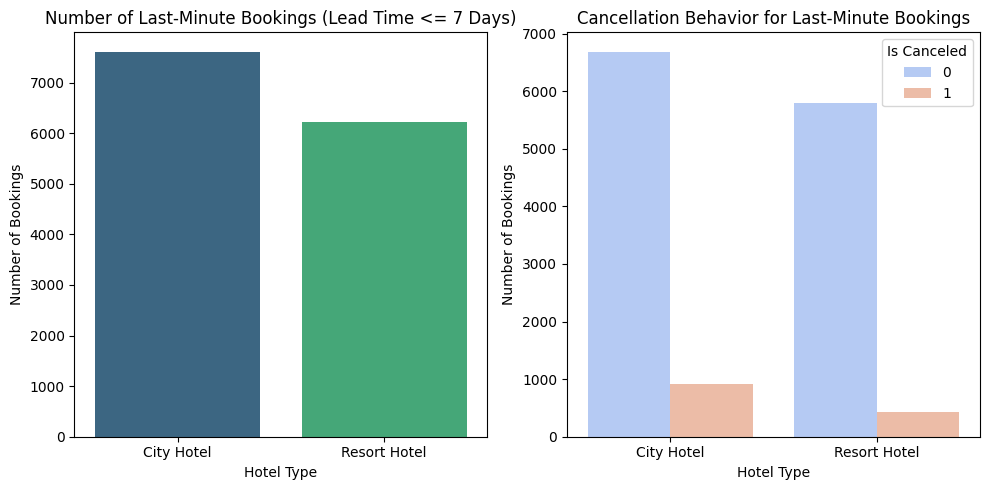

In [199]:
# 1. Definisikan pemesanan Last-Minute sebagai lead_time <= 7 hari
last_minute_bookings = data[data['lead_time'] <= 7]

# 2. Analisis berapa banyak pemesanan last-minute yang terjadi pada masing-masing hotel
last_minute_counts = last_minute_bookings['hotel'].value_counts().reset_index()
last_minute_counts.columns = ['hotel', 'count']

# 3. Analisis perilaku pembatalan untuk pemesanan last-minute
canceled_last_minute = last_minute_bookings.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')

# 4. Visualisasi distribusi pemesanan last-minute antara jenis hotel
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='hotel', y='count', data=last_minute_counts, palette='viridis',hue='hotel')
plt.title('Number of Last-Minute Bookings (Lead Time <= 7 Days)')
plt.ylabel('Number of Bookings')
plt.xlabel('Hotel Type')

# 5. Visualisasi perilaku pembatalan untuk pemesanan last-minute
plt.subplot(1, 2, 2)
sns.barplot(x='hotel', y='count', hue='is_canceled', data=canceled_last_minute, palette='coolwarm')
plt.title('Cancellation Behavior for Last-Minute Bookings')
plt.ylabel('Number of Bookings')
plt.xlabel('Hotel Type')
plt.legend(title='Is Canceled', loc='upper right')

# Menampilkan grafik
plt.tight_layout()
plt.show()

# A/B Testing:
Sebagai langkah terakhir dari project ini, anda diminta untuk melakukan pengujian A/B testing untuk menguji suatu hipotesa yang sudah dibuat.
Adapun hipotesanya adalah: <br>
* HO: The average ADR (Average Daily Rate) is the same for both City Hotel and Resort Hotel
* H1: The average ADR is different for City Hotel and Resort Hotel <br><br>
Tugas Anda:
    1. Gunakan metode A/B Testing untuk melakukan pengujian Hipotesa manakah yang diterima berdasarkan data adr yang diberikan (metode A/B testing yang digunakan dibebaskan)

Menentukan nilai Rata-Rata ADR berdasarkan masing-masing jenis hotel

In [200]:
# Memisahkan ADR berdasarkan jenis hotel
city_hotel_adr = data[data['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = data[data['hotel'] == 'Resort Hotel']['adr']

# Rata-rata ADR masing-masing
print(f"Rata-rata ADR City Hotel: {city_hotel_adr.mean():.2f}")
print(f"Rata-rata ADR Resort Hotel: {resort_hotel_adr.mean():.2f}")


Rata-rata ADR City Hotel: 104.41
Rata-rata ADR Resort Hotel: 97.18


Melakukan pengujian hipotesa menggunakan Metode Uji **T-Test**

In [201]:
# Melakukan uji t-test independen
t_stat, p_value = stats.ttest_ind(city_hotel_adr, resort_hotel_adr)

# Hasil uji t-test
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Menentukan hasil berdasarkan P-Value
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan yang signifikan antara ADR City Hotel dan Resort Hotel.")
else:
    print("Terima H0: Tidak ada perbedaan yang signifikan antara ADR City Hotel dan Resort Hotel.")


T-Statistic: 29.4312
P-Value: 0.0000
Tolak H0: Ada perbedaan yang signifikan antara ADR City Hotel dan Resort Hotel.


Melakukan pengujian hipotesa menggunakan Metode Uji **U-Test**

In [202]:
# 3. Mann-Whitney U Test (Alternatif dari T-Test)
# H0: Distribusi ADR untuk City Hotel = Distribusi ADR untuk Resort Hotel
u_stat, p_value = stats.mannwhitneyu(city_hotel_adr, resort_hotel_adr, alternative='two-sided')

print(f"Mann-Whitney U Test Statistik: {u_stat}, P-Value: {p_value}")

# Keputusan Hipotesis
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan dalam distribusi ADR antara City Hotel dan Resort Hotel.")
else:
    print("Terima H0: Tidak ada perbedaan signifikan dalam distribusi ADR antara City Hotel dan Resort Hotel.")

Mann-Whitney U Test Statistik: 1880005856.5, P-Value: 0.0
Tolak H0: Ada perbedaan signifikan dalam distribusi ADR antara City Hotel dan Resort Hotel.


# Kesimpulan :

Pada pengujian Hipotesa, keputusan hipotesis yang muncul adalah Menolak H0 karena terdapat perbedaan yang signifikan dalam distribusi ADR antara City Hotel dan Resort Hotel